## Imports

In [112]:
# !pip3 install treys scikit-fuzzy numpy pylint black tqdm

In [113]:
import random
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from utils import hand_quality, board_quality
from treys import Card, Deck, Evaluator
from tqdm import tqdm
%matplotlib inline

In [114]:
# Tips
# suit['low'] = fuzz.membership.trimf(np.arange(MIN,MAX, 1), [0,0,4]) # the last list means [start, max, end]
# suit['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [0,5,5,10]) # the last list means [start, max-start, max-end, end]

In [115]:
NAMES = ['low', 'normal', 'high']
MIN = 0
MAX = 101

In [116]:
low = [0,0,0,1]
medium = [0,1,25,50]
high = [25,50,100,100]

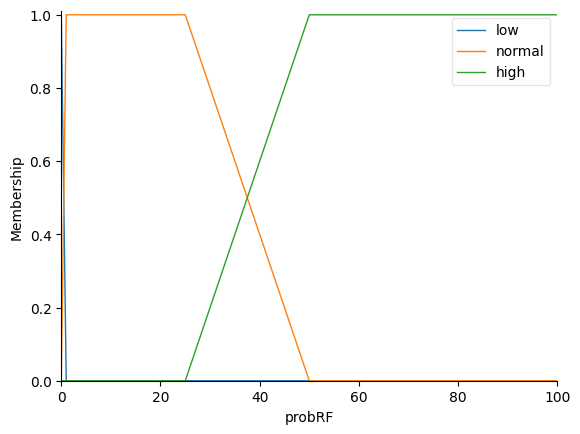

In [117]:
# Royal Flush
hand_rank = 1
probRF = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probRF')
probRF.automf(3, names = NAMES)
probRF['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probRF['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probRF['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probRF.view()

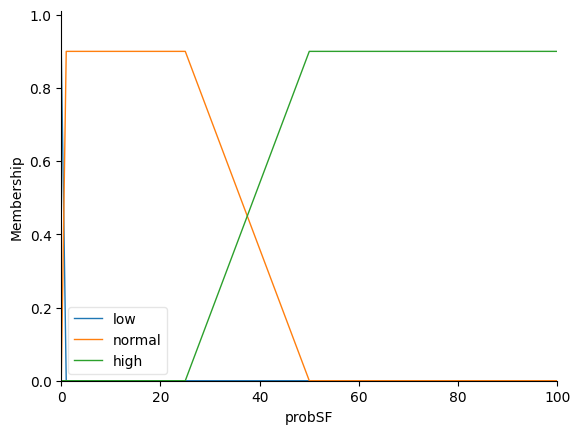

In [118]:
# Straight Flush
hand_rank = 0.9
probSF = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probSF')
probSF.automf(3, names = NAMES)
probSF['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probSF['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probSF['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probSF.view()

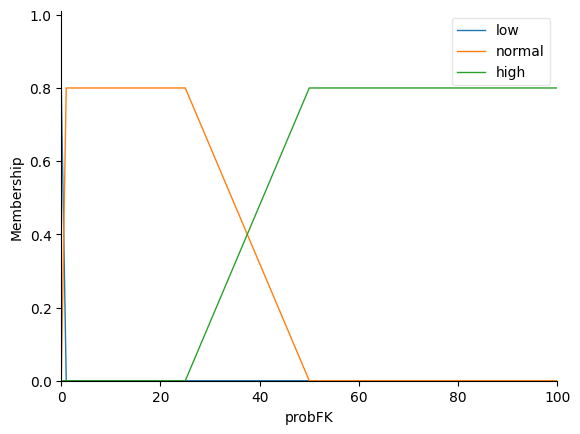

In [119]:
# Four of a Kind
hand_rank = 0.8
probFK = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probFK')
probFK.automf(3, names = NAMES)
probFK['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probFK['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probFK['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probFK.view()

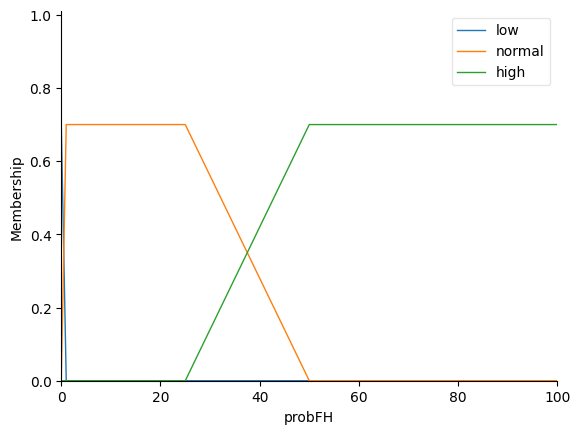

In [120]:
# Full House
hand_rank = 0.7
probFH = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probFH')
probFH.automf(3, names = NAMES)
probFH['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probFH['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probFH['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probFH.view()

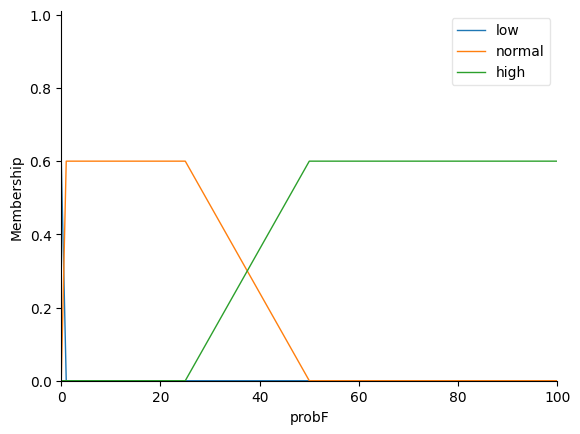

In [121]:
# Flush
hand_rank = 0.6
probF = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probF')
probF.automf(3, names = NAMES)
probF['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probF['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probF['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probF.view()

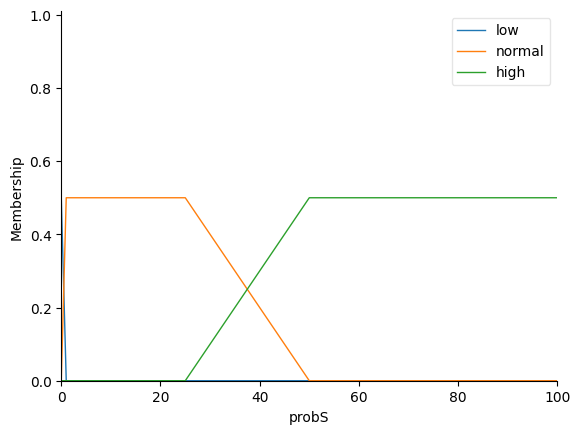

In [122]:
# Straight
hand_rank = 0.5
probS = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probS')
probS.automf(3, names = NAMES)
probS['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probS['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probS['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probS.view()

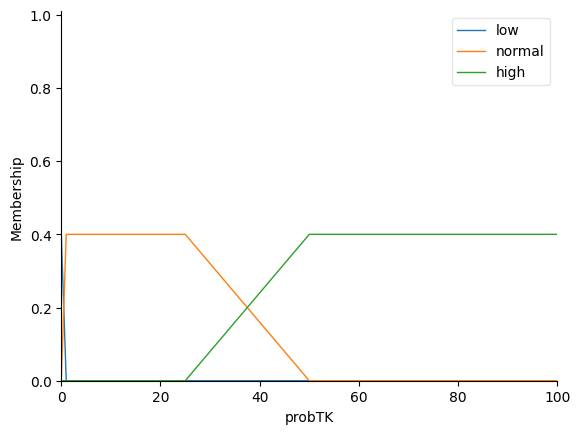

In [123]:
# Three of a Kind
hand_rank = 0.4
probTK = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probTK')
probTK.automf(3, names = NAMES)
probTK['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probTK['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probTK['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probTK.view()

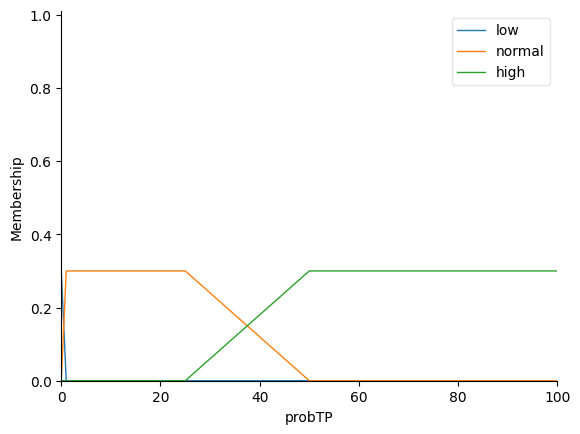

In [124]:
# Two Pair
hand_rank = 0.3
probTP = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probTP')
probTP.automf(3, names = NAMES)
probTP['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probTP['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probTP['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probTP.view()

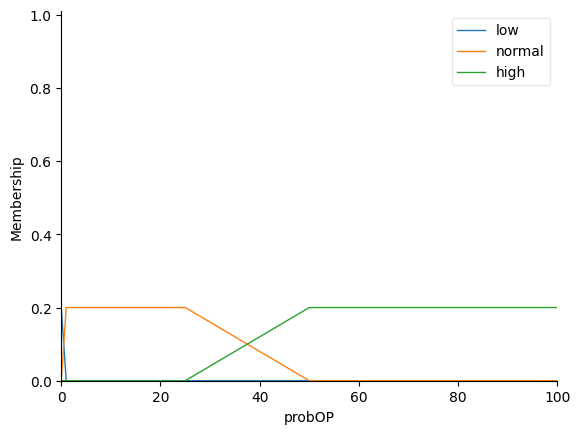

In [125]:
# One Pair
hand_rank = 0.2
probOP = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probOP')
probOP.automf(3, names = NAMES)
probOP['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probOP['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probOP['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probOP.view()

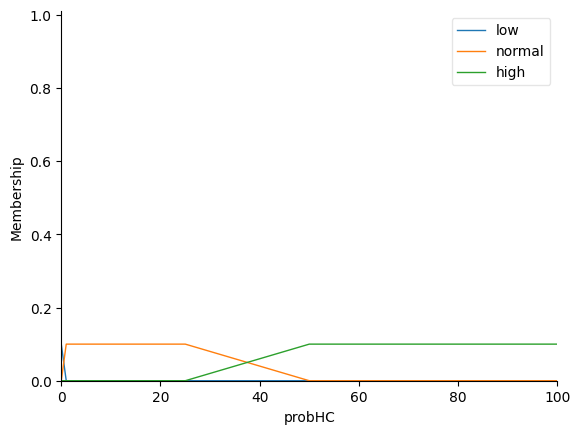

In [126]:
# High Card
hand_rank = 0.1
probHC = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'probHC')
probHC.automf(3, names = NAMES)
probHC['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), low) * hand_rank
probHC['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), medium) * hand_rank
probHC['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), high) * hand_rank
probHC.view()

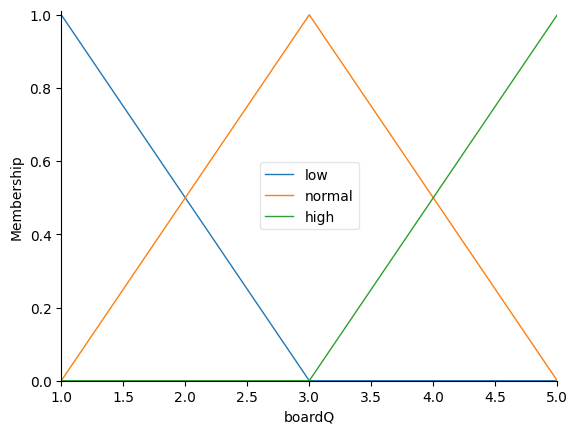

In [127]:
# Board Quality
MIN = 1; MAX = 6
boardQ = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'boardQ')
boardQ.automf(3, names = NAMES)
boardQ['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [1,1,1,3])
boardQ['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [1,3,3,5])
boardQ['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [3,5,5,5])
boardQ.view()

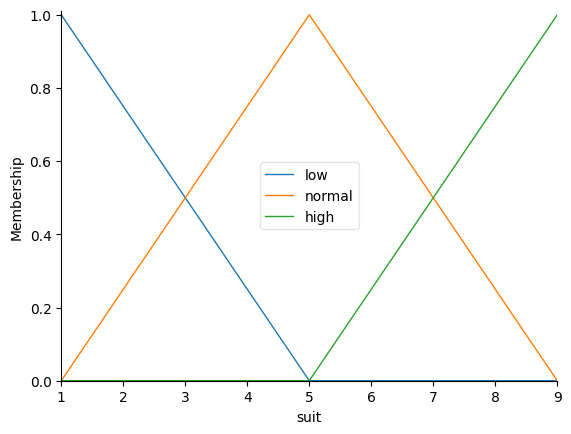

In [128]:
# FUSSIFICATION
MIN = 1; MAX = 10
suit = ctrl.Consequent(np.arange(MIN,MAX, 1), 'suit')
suit.automf(3, names = NAMES)
#suit['low'] = fuzz.membership.trimf(np.arange(MIN,MAX, 1), [1,1,3])
#suit['normal'] = fuzz.membership.trimf(np.arange(MIN,MAX, 1), [2,3,4])
#suit['high'] = fuzz.membership.trimf(np.arange(MIN,MAX, 1), [3,5,5])
suit.view()

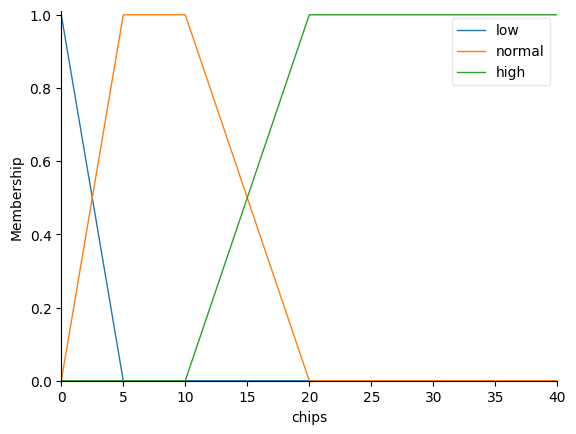

In [129]:
MIN = 0
MAX = 41
chips = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'chips')
chips.automf(3, names = NAMES)
chips['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [0,0,0,5])
chips['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [0,5,10,20])
chips['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [10,20,40,40])
chips.accumulative_method=True
chips.view()

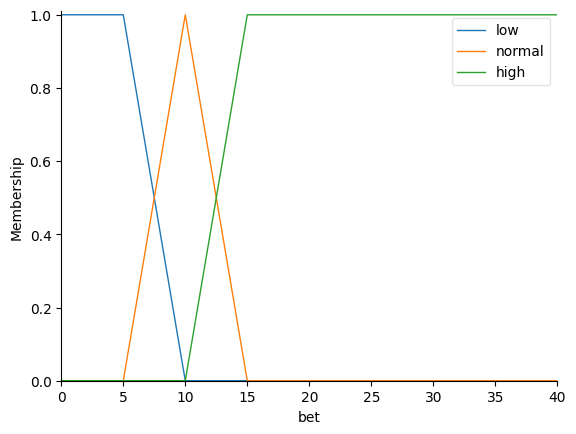

In [130]:
bet = ctrl.Antecedent(np.arange(MIN,MAX, 1), 'bet')
bet.automf(3, names=NAMES)
bet['low'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [0,0,5,10])
bet['normal'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [5,10,10,15])
bet['high'] = fuzz.membership.trapmf(np.arange(MIN,MAX, 1), [10,15,40,40])
bet.view()

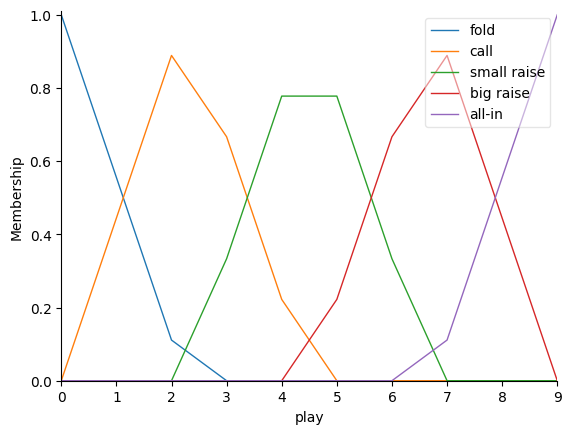

In [131]:
MAX = 10
play = ctrl.Consequent(np.arange(MIN,MAX, 1), 'play')
play.automf(4, names=['fold', 'call', 'small raise', 'big raise', 'all-in'])
play.view()

In [136]:
## FUZZY RULES
rules = [
    ctrl.Rule(probRF['low'] | probSF['low'] | probFK['low'] | probFH['low'] | probF['low'] | probS['low'] | probTK['low'] | probTP['low'] | probOP['low'] | probHC['low'], suit['low']),
    ctrl.Rule(probRF['normal'] | probSF['normal'] | probFK['normal'] | probFH['normal'] | probF['normal'] | probS['normal'] | probTK['normal'] | probTP['normal'] | probOP['normal'] | probHC['normal'], suit['normal']),
    ctrl.Rule(probRF['high'] | probSF['high'] | probFK['high'] | probFH['high'] | probF['high'] | probS['high'] | probTK['high'] | probTP['high'] | probOP['high'] | probHC['high'], suit['high']),
    ctrl.Rule(suit['low'], play['fold']),
    ctrl.Rule(suit['normal'] & chips['low'], play['all-in']),
    ctrl.Rule(suit['normal'] & chips['normal'] & bet['low'], play['call']),
    ctrl.Rule(suit['normal'] & chips['normal'] & bet['normal'], play['call']),
    ctrl.Rule(suit['normal'] & chips['normal'] & bet['high'], play['fold']),
    ctrl.Rule(suit['normal'] & chips['high'] & bet['low'], play['all-in']),
    ctrl.Rule(suit['normal'] & chips['high'] & bet['normal'], play['call']),
    ctrl.Rule(suit['normal'] & chips['high'] & bet['high'], play['fold']),
    ctrl.Rule(suit['high'] & chips['low'], play['all-in']),
    ctrl.Rule(suit['high'] & chips['high'], play['all-in']),
    ctrl.Rule(suit['high'] & chips['normal'] & bet['low'], play['small raise']),
    ctrl.Rule(suit['high'] & chips['normal'] & bet['normal'], play['call']),
    ctrl.Rule(suit['high'] & chips['normal'] & bet['high'], play['all-in']),
]
problem_ctrl  = ctrl.ControlSystem(rules)
problem = ctrl.ControlSystemSimulation(problem_ctrl)

3.3028517070005528
2.5550696741867873


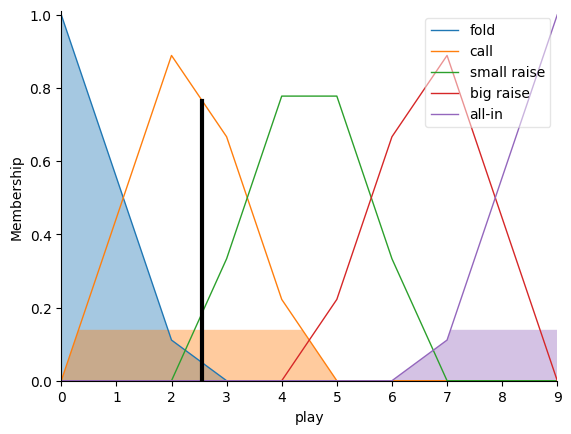

In [138]:
def bestPlay(problem,bet,chips,probs, board_q):
    ## APPLICATION
    problem.input["probRF"] = probs["Royal Flush"]
    problem.input["probSF"] = probs["Straight Flush"]
    problem.input["probFK"] = probs["Four of a Kind"]
    problem.input["probFH"] = probs["Full House"]
    problem.input["probF"] = probs["Flush"]
    problem.input["probS"] = probs["Straight"]
    problem.input["probTK"] = probs["Three of a Kind"]
    problem.input["probTP"] = probs["Two Pair"]
    problem.input["probOP"] = probs["Pair"]
    problem.input["probHC"] = probs["High Card"]
    problem.input['bet'] = bet
    problem.input['chips'] = chips
    # problem.input["boardQ"] = board_q
    problem.compute()

    return problem

probs = {'Royal Flush': 0.0, 'Straight Flush': 0.0, 'Four of a Kind': 0.0, 'Full House': 0.0, 'Flush': 0.0, 'Straight': 0.0, 'Three of a Kind': 0.0, 'Two Pair': 0.0, 'Pair': 0.6956521739130435, 'High Card': 0.0}
problem = bestPlay(problem,1,1,probs, board_q=5)
print(problem.output['suit'])
print(problem.output['play'])
play.view(sim=problem)

4.346184738955824
4.52143818410192


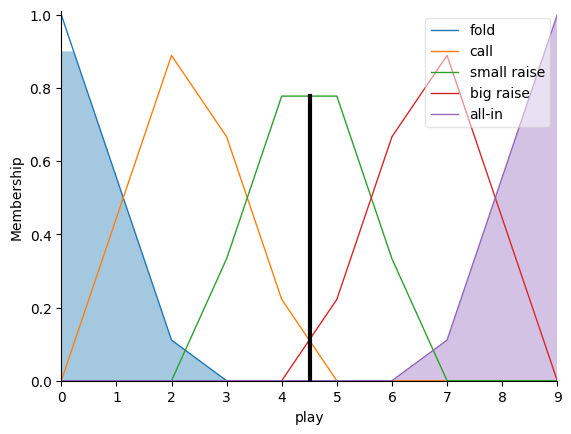

In [141]:
probs = {'Royal Flush': 1.0, 'Straight Flush': 0.0, 'Four of a Kind': 0.0, 'Full House': 0.0, 'Flush': 0.0, 'Straight': 0.0, 'Three of a Kind': 0.0, 'Two Pair': 0.0, 'Pair': 0.3, 'High Card': 0.0}
problem = bestPlay(problem,1,20,probs, board_q=5)
print(problem.output['suit'])
print(problem.output['play'])
play.view(sim=problem)

4.346184738955824
4.52143818410192


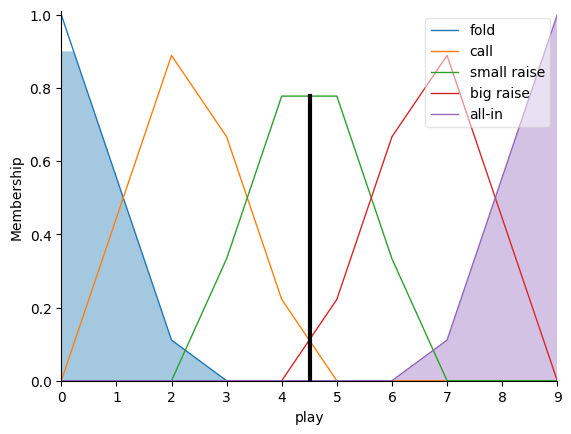

In [142]:
probs = {'Royal Flush': 1.0, 'Straight Flush': 0.0, 'Four of a Kind': 0.0, 'Full House': 0.0, 'Flush': 0.0, 'Straight': 0.0, 'Three of a Kind': 0.0, 'Two Pair': 0.0, 'Pair': 0.3, 'High Card': 0.0}
problem = bestPlay(problem,1,20,probs, board_q=1)
print(problem.output['suit'])
print(problem.output['play'])
play.view(sim=problem)

In [143]:
wins=0
losses=0

# iterate full games
for _ in tqdm(range(10), desc="Playing Poker..."):
    player1_chips = 20
    player2_chips = 20

    # iterate games until one side loses
    while player1_chips !=0 and player2_chips != 0:
        deck = Deck()
        player1_hand = deck.draw(2)
        player2_hand = deck.draw(2)
        board = deck.draw(2)
        #Card.print_pretty_cards(player1_hand)
        #Card.print_pretty_cards(player2_hand)
        #Card.print_pretty_cards(board)

        player1_bet = 1
        player2_bet = 1
        # iterate each round
        for i in range(3):
            board = board + deck.draw(1)
            probs = hand_quality(player1_hand + board)
            board_q = board_quality(board)
            problem = bestPlay(problem,player1_bet,player1_chips,probs, board_q)

            action1 = "fold" if problem.output['play'] < 1.5 else "call" if problem.output['play'] < 4.5 else "raise" if problem.output['play'] < 7.5 else "all-in"

            action2 = random.choice(["call","call","call","all-in","raise","fold"])

            if action1=="fold":
                break
            elif action1=="call":
                player1_bet = min(player2_bet, player1_chips)
            elif action1=="raise":
                player1_bet = min(player1_bet*2, player1_chips)
            else:
                player1_bet = min(player2_chips, player1_chips)
            
            if action2=="fold":
                break
            elif action2=="call":
                player2_bet = min(player1_bet, player2_chips)
            elif action1=="raise":
                player2_bet = min(player2_bet*2, player2_chips)
            else:
                player2_bet = min(player2_chips, player1_chips)
            
            if i==2 and player1_bet!=player2_bet:
                probs = hand_quality(player1_hand + board)
                board_q = board_quality(board)
                problem = bestPlay(problem,player1_bet,player1_chips,probs, board_q)

                if problem.output['play'] < 1.5:
                    break
                else:
                    player1_bet = min(player2_bet, player1_chips)
        
        if action1=="fold":
            player1_chips -= player1_bet
            player2_chips += player1_bet
            continue

        if action2=="fold":
            player1_chips += player2_bet
            player2_chips -= player2_bet
            continue

        evaluator = Evaluator()

        score1 = evaluator.evaluate(board, player1_hand)
        score2 = evaluator.evaluate(board, player2_hand)

        if score1<score2:
            player1_chips -= player1_bet
            player2_chips += player1_bet
            continue

        if score1>score2:
            player1_chips += player2_bet
            player2_chips -= player2_bet
            continue

    if player1_chips==0:
        losses+=1
    else:
        wins+=1
print(f"The algorithm won {win} times, and lost {losses} times")

Playing Poker...:  10%|█         | 1/10 [02:35<23:21, 155.69s/it]